### 사전작업

**라이브러리 imports**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto

##---##
import warnings
warnings.filterwarnings('ignore')

**데이터 들여오기**

In [15]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 855kB/s]
100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 854kB/s]


In [16]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [17]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [18]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

In [19]:
!rm data_description.txt
!rm sample_submission.csv
!rm test.csv
!rm train.csv
!rm house-prices-advanced-regression-techniques.zip

**적합**

## 서버 컴퓨터 테스트

In [20]:
predictr = TabularPredictor(label = 'SalePrice')
predictr.fit(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231204_122054"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231204_122054"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
CPU Count

[1000]	valid_set's rmse: 28056.7
[2000]	valid_set's rmse: 27819.9
[3000]	valid_set's rmse: 27759.4
[4000]	valid_set's rmse: 27748.5
[5000]	valid_set's rmse: 27748
[6000]	valid_set's rmse: 27748.3


	-27747.7866	 = Validation score   (-root_mean_squared_error)
	46.41s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 29938.2
[2000]	valid_set's rmse: 29338.1
[3000]	valid_set's rmse: 29179.7
[4000]	valid_set's rmse: 29134.7
[5000]	valid_set's rmse: 29123.3
[6000]	valid_set's rmse: 29121.3
[7000]	valid_set's rmse: 29120.9
[8000]	valid_set's rmse: 29120.7
[9000]	valid_set's rmse: 29120.7
[10000]	valid_set's rmse: 29120.7


	-29120.7058	 = Validation score   (-root_mean_squared_error)
	78.04s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-32782.3258	 = Validation score   (-root_mean_squared_error)
	0.54s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
	-28469.5345	 = Validation score   (-root_mean_squared_error)
	813.83s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-32118.1511	 = Validation score   (-root_mean_squared_error)
	0.47s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-34759.9898	 = Validation score   (-root_mean_squared_error)
	5.3s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-27789.6805	 = Validation score   (-root_mean_squared_error)
	1.52s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-36724.0646	 = Validation score   (-root_mean_squared_error)
	8.07s	 = Training   run

[1000]	valid_set's rmse: 32617.4
[2000]	valid_set's rmse: 32565.8
[3000]	valid_set's rmse: 32562.9


	-32562.8199	 = Validation score   (-root_mean_squared_error)
	109.18s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMXT': 0.423, 'XGBoost': 0.423, 'CatBoost': 0.115, 'LightGBM': 0.038}
	-26604.6052	 = Validation score   (-root_mean_squared_error)
	0.2s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1065.21s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20231204_122054")


## **해석 및 시각화**

`-` 변수들 중 `SalePrice`를 예측하는 데 적절한 변수들을 조사해보자.

No path specified. Models will be saved in: "AutogluonModels\ag-20231203_072748\"


### Model Prediction for SalePrice

Using validation data for `Test` points

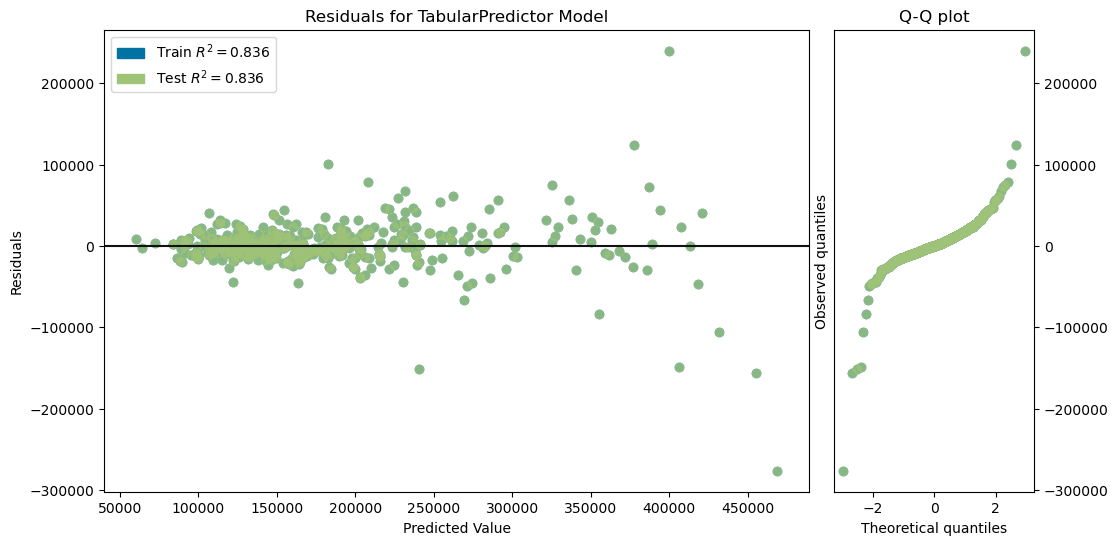

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-30443.008759,-32323.230399,0.0321,0.024634,0.531838,0.0321,0.024634,0.531838,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
OverallQual,11353.616144,566.992406,7.438933e-07,5,12521.061346,10186.170943
GrLivArea,6860.611234,350.347117,8.132342e-07,5,7581.980791,6139.241677
GarageCars,2770.776411,314.377676,1.955078e-05,5,3418.084390,2123.468432
TotalBsmtSF,2597.306824,402.834463,6.726548e-05,5,3426.748550,1767.865098
BsmtFinSF1,2570.693794,157.899021,1.699480e-06,5,2895.810061,2245.577527
Neighborhood,1923.740076,422.205830,2.613985e-04,5,2793.067715,1054.412436
1stFlrSF,1286.396798,183.863286,4.874429e-05,5,1664.973846,907.819750
HalfBath,900.705239,303.898043,1.344494e-03,5,1526.435510,274.974967
YearRemodAdd,840.615401,242.701603,7.486712e-04,5,1340.341356,340.889446
ExterQual,721.719360,336.491486,4.336722e-03,5,1414.559979,28.878740


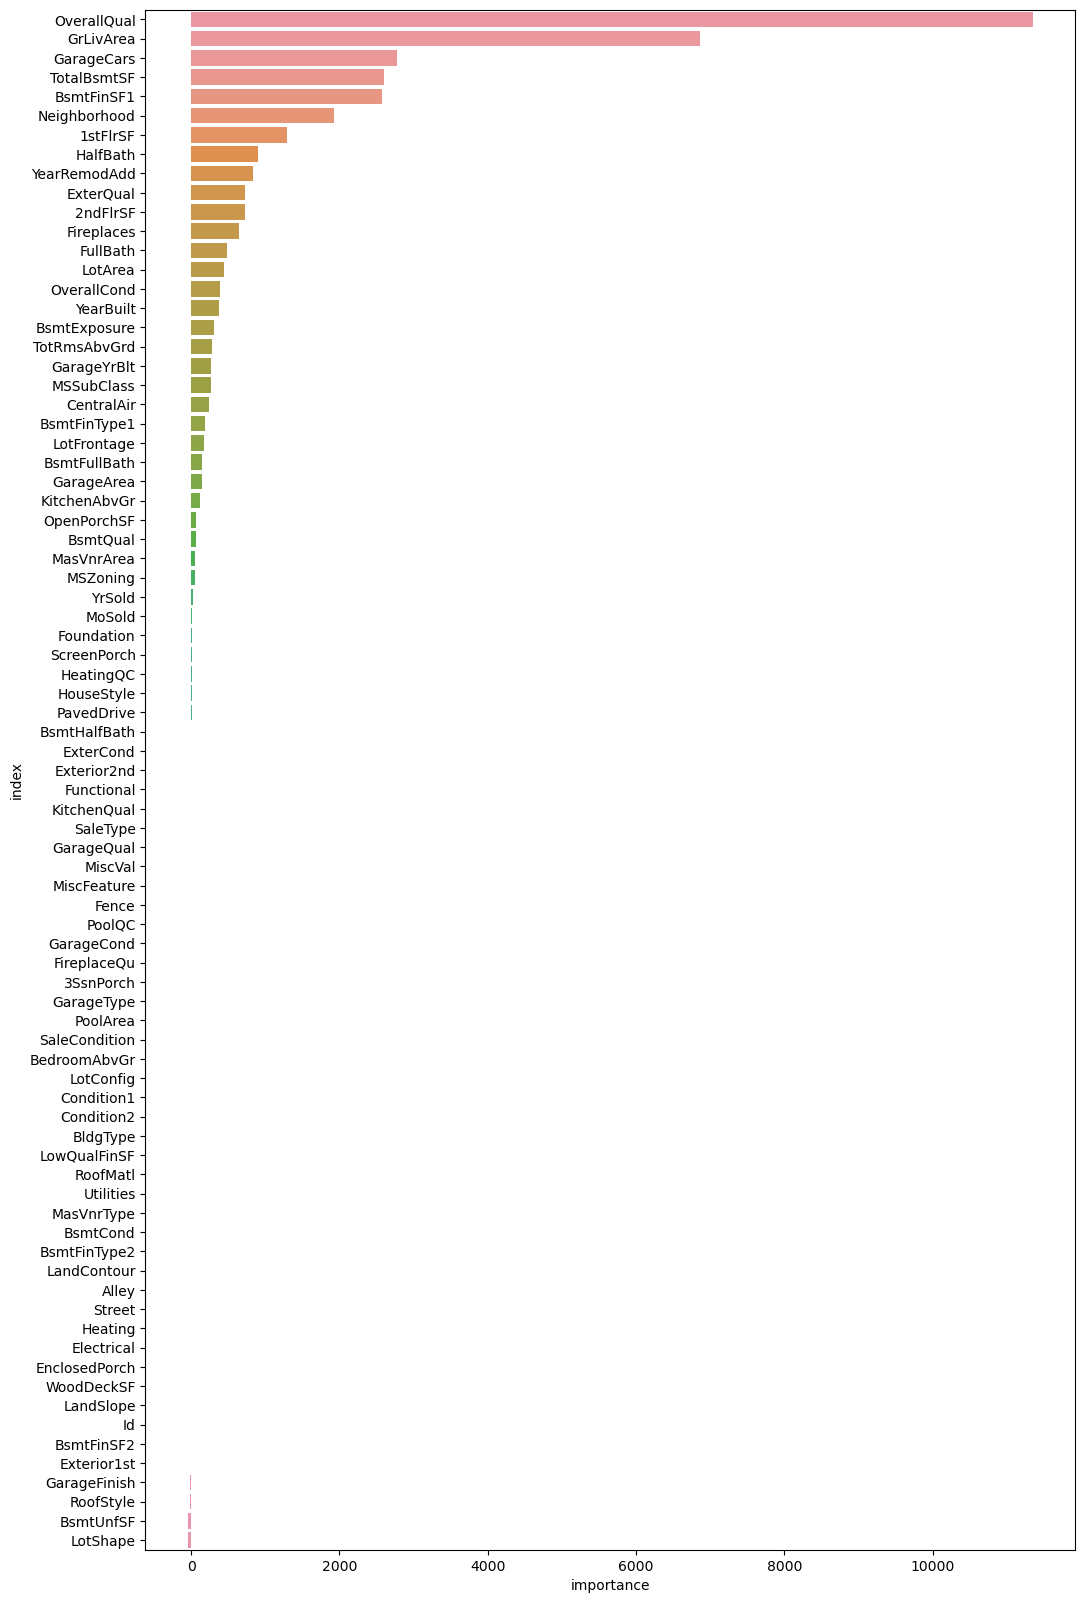

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_pred,error
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,468543.187500,276456.812500
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,NaN,0,1,2008,New,Partial,160000,399951.062500,239951.062500
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,3,2010,New,Partial,611657,455022.937500,156634.062500
688,689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,...,NaN,NaN,0,10,2007,New,Partial,392000,240830.062500,151169.937500
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2009,WD,Normal,555000,406363.468750,148636.531250
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2009,New,Partial,253293,377153.343750,123860.343750
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,538000,431561.562500,106438.437500
632,633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2009,WD,Family,82500,182901.046875,100401.046875
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,0,10,2006,New,Partial,438780,355096.281250,83683.718750
666,667,60,RL,NaN,18450,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Abnorml,129000,207953.234375,78953.234375


In [11]:
auto.quick_fit(
    train_data = df_train,
    label = 'SalePrice',
    show_feature_importance_barplots = True
)

### **Feature Importance for Trained Model**

상위 6개의 설명변수에 대해서 알아보면 아래와 같다.

|importance rank|feature|descriptions|
|:-:|:-:|:-:|
|1|`OverallQual`|전반적인 주택의 품질(건축자재, 마감 처리 품질 등)|
|2|`GrLivArea`|생활공간의 면적(주택 평방피트 수)|
|3|`GarageCars`|차고의 면적|
|4|`TotalBsmtSF`|지하실의 면적|
|5|`BsmtFinSF1`|Type 1에 해당하는 지하실의 면적|
|6|`Neighborhood`|아이오와 주 에임스 시의 어느 지역에 속해있는 지에 대한 정보|

**끝**